In [150]:
import pandas as pd

data = pd.read_csv('sample_coco.txt', header = None, names=["id", "height","width", "x","y","w","h","name"])
# Clean data
data['id'] = data['id'].map(lambda x: x.lstrip('id: '))
data['height'] = data['id'].map(lambda x: x.lstrip('height: '))
data['width'] = data['id'].map(lambda x: x.lstrip('width: '))
data['x'] = data['id'].map(lambda x: x.lstrip('bbox:[ '))
data['h'] = data['id'].map(lambda x: x.rstrip('] '))
print(data)

       id height width   x    y    w   h  name
0       0      0     0   0  464  312   0   NaN
1       1      1     1   1  292   83   1   NaN
2       3      3     3   3  312  267   3   NaN
3      34     34    34  34  112  319  34   NaN
4      20     20    20  20  368  146  20   NaN
...    ..    ...   ...  ..  ...  ...  ..   ...
10100   2      2     2   2  129  234   2   NaN
10101  37     37    37  37   78  140  37   NaN
10102  15     15    15  15  240  297  15   NaN
10103  69     69    69  69  168  271  69   NaN
10104  62     62    62  62   46  320  62   NaN

[10105 rows x 8 columns]


In [151]:
# importing the module
import json
import ast

# reading the data from the file
with open('ms_coco_classnames.txt') as f:
    names = f.read()
print("Data type before reconstruction : ", type(data))
class_names = ast.literal_eval(names)
# print(json.dumps(json_data))
print("Data type before reconstruction : ", type(class_names))

Data type before reconstruction :  <class 'pandas.core.frame.DataFrame'>
Data type before reconstruction :  <class 'dict'>


## class distribution

In [154]:
for i in range(len(data)):
    data['name'][i] = class_names[data['id'][i]]

<ipython-input-154-126252a8bcf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'][i] = class_names[data['id'][i]]


<AxesSubplot:>

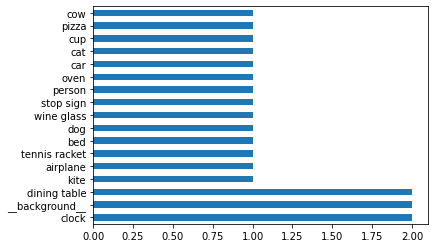

In [158]:
class_number = 20
data['name'][:class_number].value_counts().plot(kind='barh')

## Anchor Boxes

In [173]:
k = 3
data_points = 1000
x = data[['w','h']][:data_points]

In [174]:
x

,w,h
0,312,0
1,83,1
2,267,3
3,319,34
4,146,20
...,...,...
995,330,49
996,204,37
997,309,17
998,367,53


In [175]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [176]:
kmeans.cluster_centers_

array([[105.22792023,  40.88888889],
       [230.47865854,  38.72865854],
       [344.18068536,  39.99376947]])

In [186]:
x['h'].max()

'9'

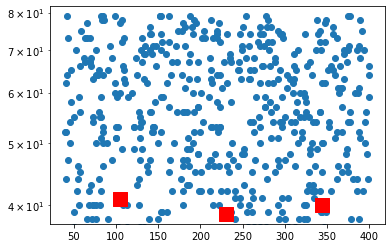

In [184]:
import matplotlib.pyplot as plt
plt.scatter(x['w'].values, x['h'].values)

for cluster in kmeans.cluster_centers_:
    plt.scatter(cluster[0], cluster[1], s=200, c="r", marker="s")
# plt.xscale('log')
plt.yscale('log')
plt.show()

In [187]:
cluster

array([344.18068536,  39.99376947])

## Draw Anchor Box

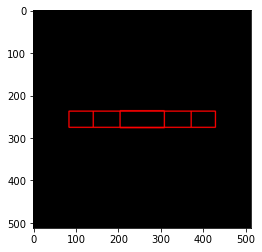

In [213]:
import numpy as np
import cv2
# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2
# image = np.zeros((320,320))
image = np.zeros([512,512,3],dtype=np.uint8)
# start_point = (256,256)
center_point = (256,256)
for cluster in kmeans.cluster_centers_:
    start_point = (center_point[0] -int(cluster[0]/2), center_point[1] -int(cluster[1]/2))
    end_point = (center_point[0] +int(cluster[0]/2),center_point[1] +int(cluster[1]/2))
    # print(end_point)
    image = cv2.rectangle(image, start_point, end_point, color, thickness)
plt.imshow(image)